In [43]:
#Load libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# load data
df = pd.read_csv('../data/user_loggedin_teacher.csv', delimiter=',')
df_copy = df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18949 non-null  int64 
 1   id           18949 non-null  int64 
 2   department   17846 non-null  object
 3   timecreated  18949 non-null  int64 
 4   rol          18949 non-null  object
 5   userid       18949 non-null  object
dtypes: int64(3), object(3)
memory usage: 888.4+ KB


In [39]:
df['department'].unique()

array(['Departamento De Español y Literatura',
       'Departamento De Informática Educativa',
       'Departamento de Salud Pública', nan, 'Dpto De Ciencias Naturales',
       'Departamento De Ciencias Jurídicas',
       'Departamento De Ingeniería Industrial',
       'Dpto De Ing Agronómica Y Desarroll Rural',
       'Dpto Ciencias Administrativas', 'Departamento De Enfermería',
       'Departamento De Idiomas Extranjeros', 'Departamento De Química',
       'Dpto De Ing De Sistemas Y Telecomunicaci',
       'Departamento De Matemáticas Y Estadístic',
       'Departamento de Regencía Y Farmacia', 'Departamento De Biología',
       'Departamento de Psicopedagogía', 'Dpto De Ingeniería Ambiental',
       'Dpto De Cultura Física, Recreac Y Deport',
       'Departamento De Ciencias Pecuarías',
       'Departamento De Geografía Y Medio Ambien',
       'Departamento De Bacteriología',
       'Departamento de Física y Electrónica', ' Ingeniería Mecánica',
       'ENFERMERÍA', 'Departamento D

In [59]:
# 1. Clear the Departament column
df = df.dropna(subset=['department'])
df['department'] = df['department'].str.lower()
df['department'] = df['department'].str.strip()
correcciones = {
    'dpto': 'departamento',
    'ing': 'ingeniería',
    'desarroll': 'desarrollo',
    'telecomunicaci': 'telecomunicaciones',
    'estadístic': 'estadística',
    'recreac': 'recreación',
    'deport': 'deporte',
    'ambien': 'ambiente',
    'lic': 'licenciatura',
    'jurdicas': 'jurídicas',
    'geografa': 'geografía',
    'fsica': 'física',
    'biologia': 'biología',
    'regencía': 'regencia',
    'informatica': 'informática',
    'publica': 'pública',
    'pblica': 'pública',
    'bacteriologia': 'bacteriología',
    }

for key, value in correcciones.items():
    df['department'] = df['department'].str.replace(r'\b' + key + r'\b', value, regex=True)

df['department'] = df['department'].str.replace(r'\s*d\s*p$', '', regex=True)

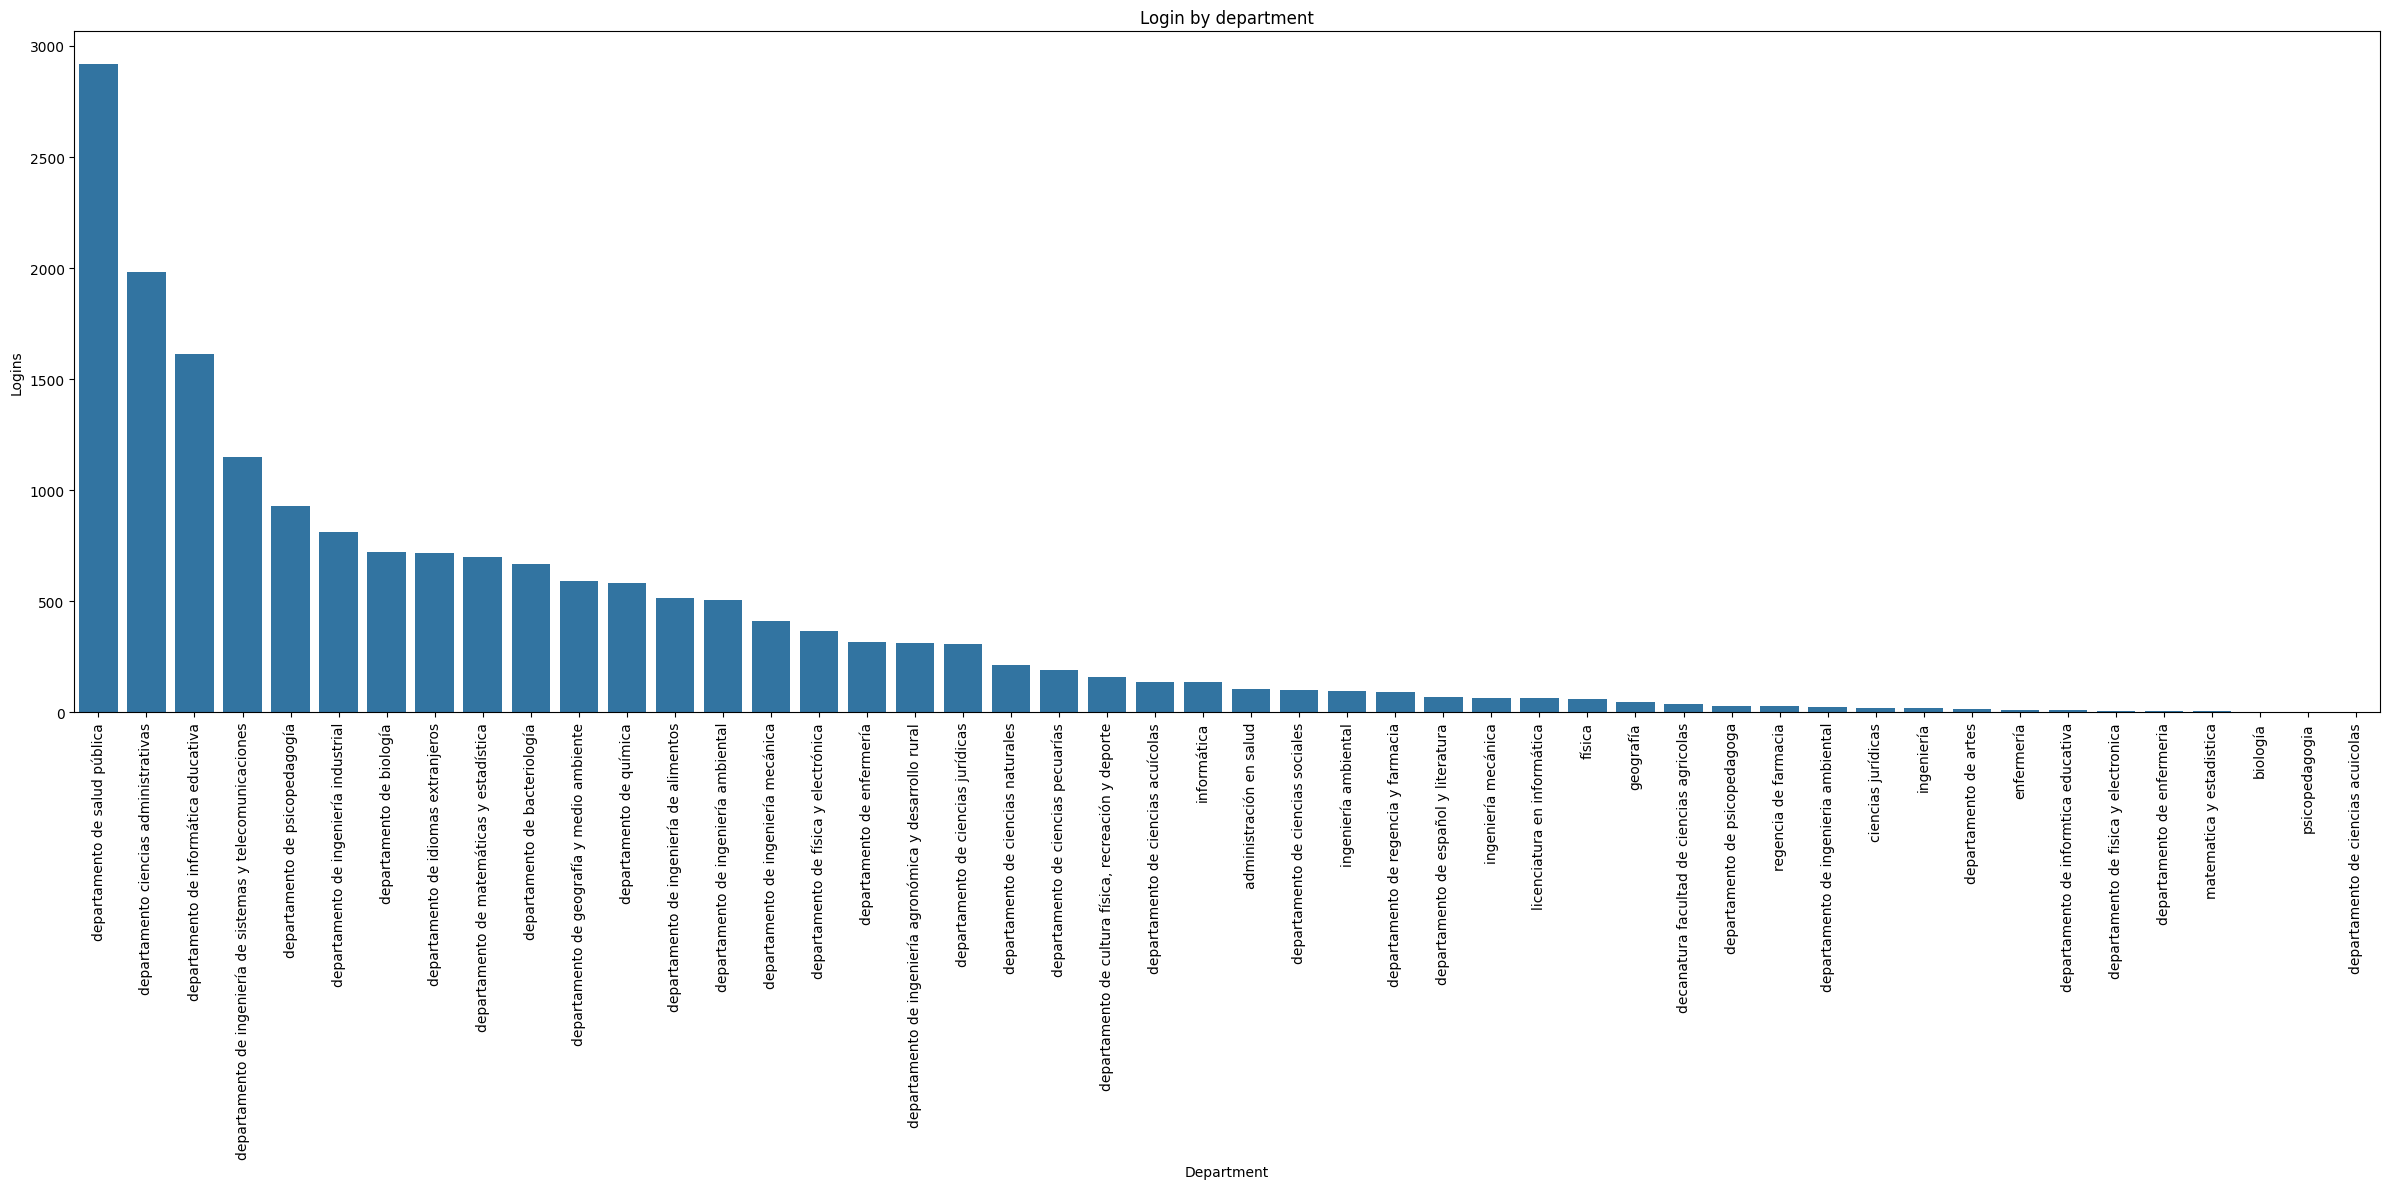

In [64]:
# 2. Show total Login by department and bar graph
# 4. Login bar graph by department
login_by_department = df['department'].value_counts()
plt.figure(figsize=(24, 12))
sns.barplot(x=login_by_department.index, y=login_by_department.values)
plt.title('Login by department')
plt.xlabel('Department')
plt.ylabel('Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [61]:
# 3. Display the total number of logins per teacher in a specific program
specific_program = 'departamento de ciencias naturales'
df_program = df[df['department'] == specific_program]
logins_per_teacher = df_program['id'].value_counts()
logins_per_teacher

id
340      79
15621    47
357      40
355      26
364      11
366       6
365       1
372       1
Name: count, dtype: int64

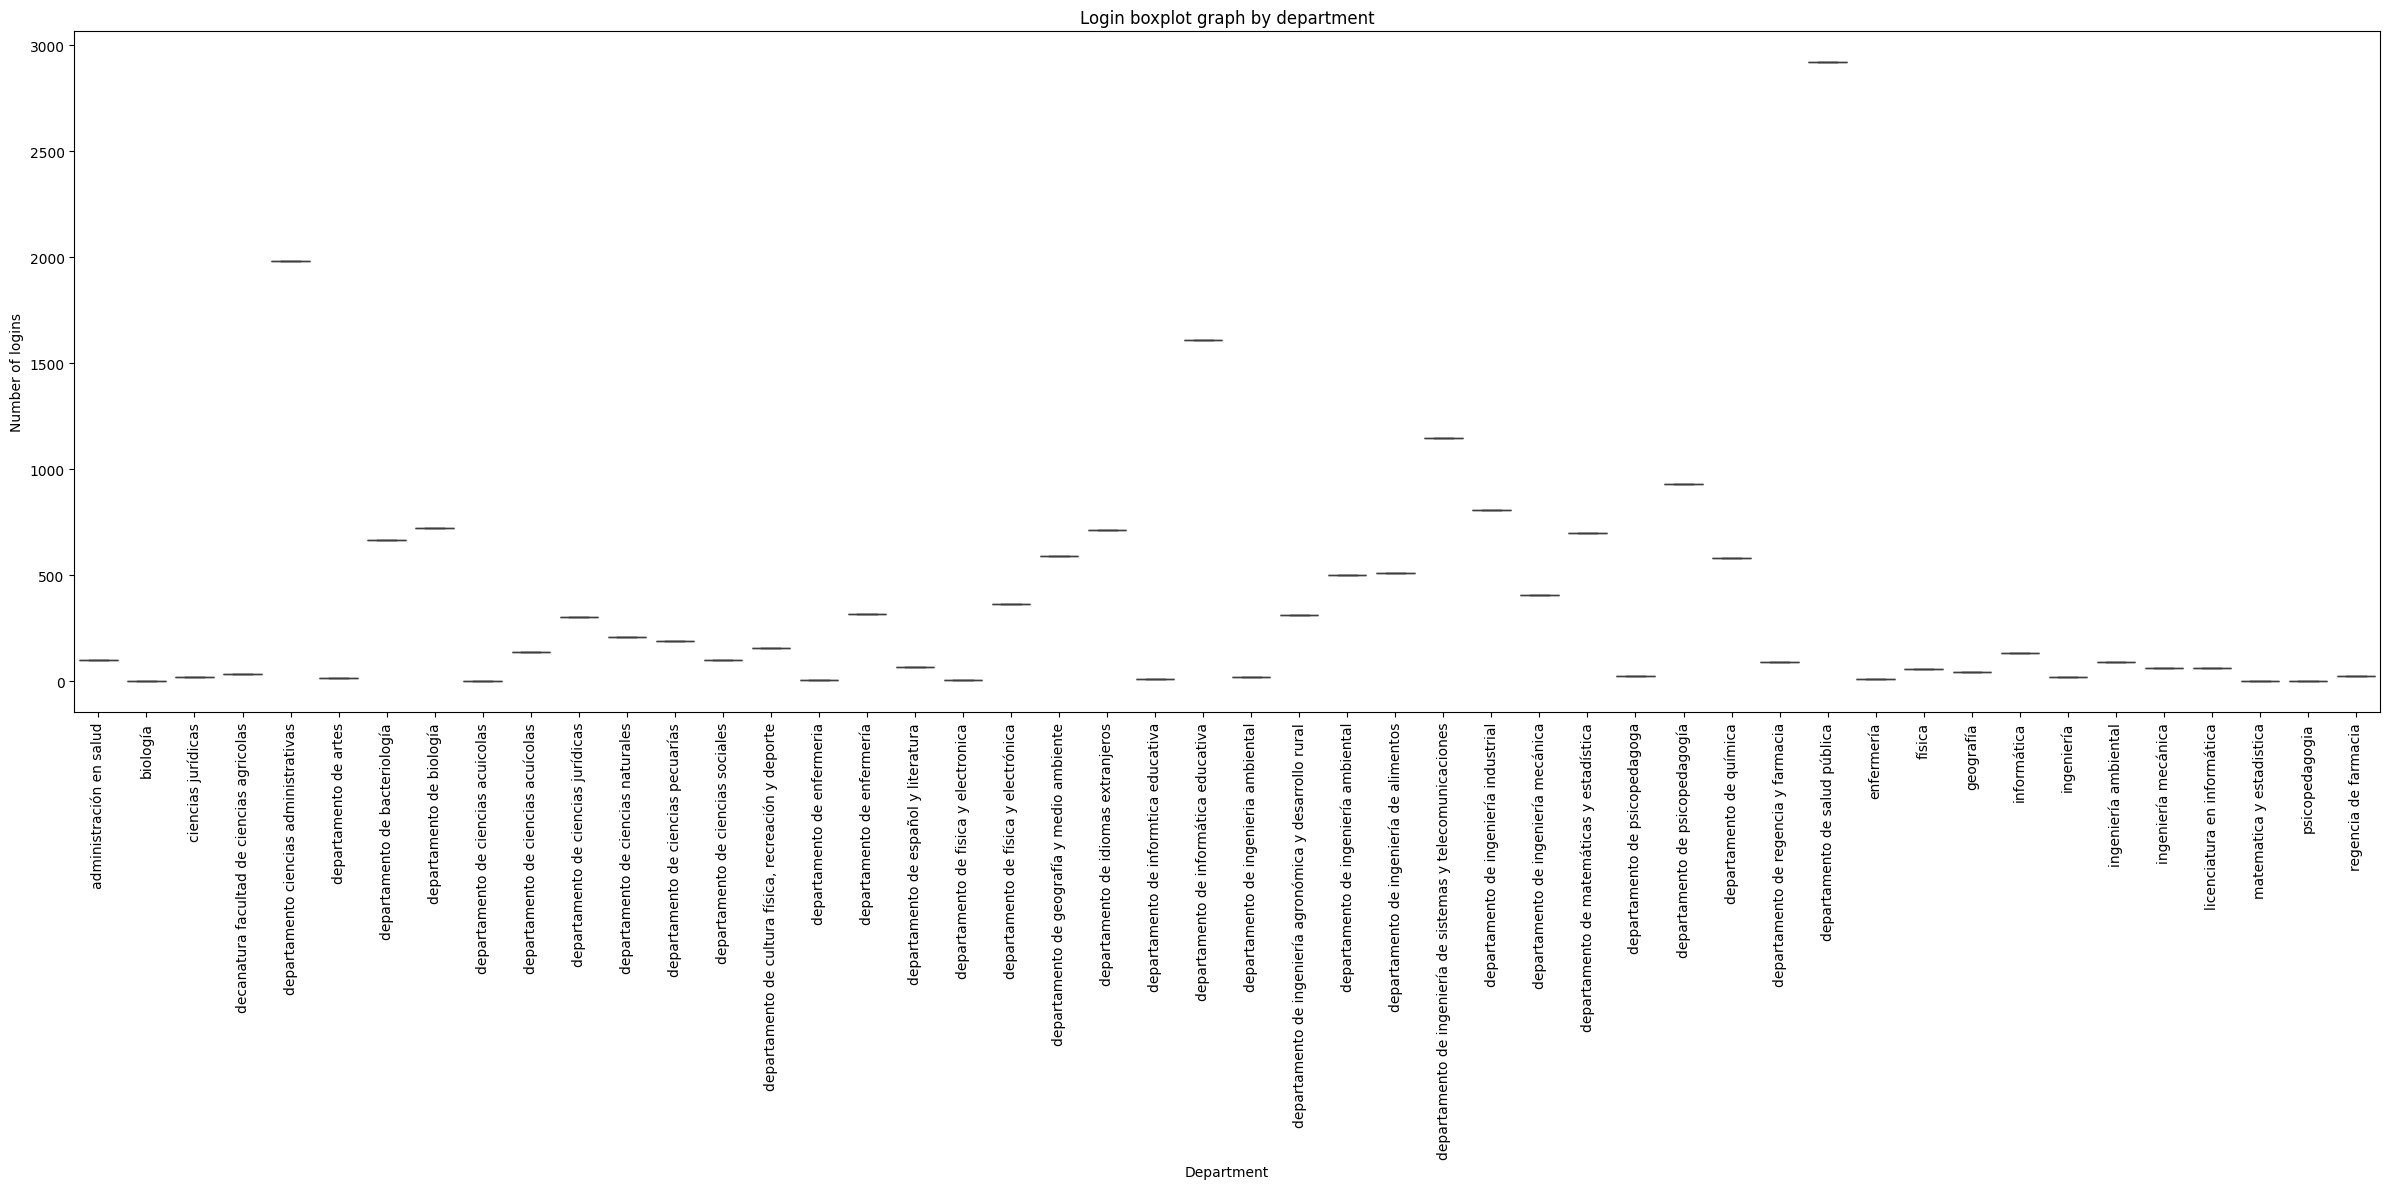

In [65]:
# 5. Login boxplot graph by department
df['logins'] = 1
logins_per_department = df.groupby('department')['logins'].sum().reset_index()

plt.figure(figsize=(24, 12))
sns.boxplot(x='department', y='logins', data=logins_per_department)
plt.title('Login boxplot graph by department')
plt.xlabel('Department')
plt.ylabel('Number of logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [63]:
# 6. Login average by department
logins_per_user = df.groupby(['department', 'id']).size().reset_index(name='logins')
average = logins_per_user.groupby('department')['logins'].mean().reset_index()
average

,department,logins
0,administración en salud,51.500000
1,biología,2.000000
2,ciencias jurídicas,20.000000
3,decanatura facultad de ciencias agricolas,18.500000
4,departamento ciencias administrativas,50.846154
5,departamento de artes,16.000000
6,departamento de bacteriología,20.242424
7,departamento de biología,22.593750
8,departamento de ciencias acuicolas,1.000000
9,departamento de ciencias acuícolas,15.222222


In [66]:
# 7. Quartiles of teachers by department
quartiles_per_department = logins_per_user.groupby('department')['logins'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles_per_department.columns = ['Q1', 'Q2', 'Q3']
quartiles_per_department

,Q1,Q2,Q3
department,,,
administración en salud,50.25,51.5,52.75
biología,2.00,2.0,2.00
ciencias jurídicas,20.00,20.0,20.00
decanatura facultad de ciencias agricolas,9.75,18.5,27.25
departamento ciencias administrativas,28.00,44.0,70.50
departamento de artes,16.00,16.0,16.00
departamento de bacteriología,6.00,11.0,24.00
departamento de biología,6.50,18.0,31.50
departamento de ciencias acuicolas,1.00,1.0,1.00
